## Знакомство с данными: винные обзоры

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('wine.csv')
display(df)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
## Какова максимальная цена за бутылку в этом наборе данных? Введите целое число.
df.describe().loc[:, ['price']]

,price
count,120975.000000
mean,35.363389
std,41.022218
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [4]:
##Сколько всего дегустаторов приняло участие в винных обзорах?
df['taster_name'].nunique()

19

In [5]:
## Задание 5.2
## Проанализируйте представленный датасет и перечислите все числовые признаки через запятую.
df.nunique() # смотрим на кол-во уникальных признаков

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

In [6]:
df.info() # посмотрим на типы признаков. Претендента всего 2: points, price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

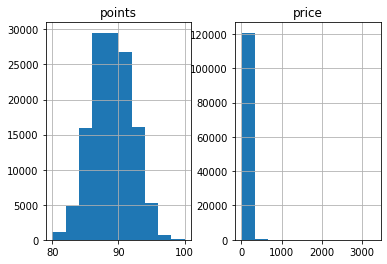

In [7]:
##Смотрим на описание признаков и на распределение, чтобы точно убедиться, что они числовые:
# построим распеределение всех возможных признаков быстрой просто визуализацией
hist = df.hist()
hist

In [8]:
##Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их. 
##В поле ниже введите, сколько дублирующихся записей вам удалось обнаружить.
mask = df.duplicated(subset=df.columns) # маска для фильтрации
df_duplicates = df[mask] # фильтруем наш датасет
print(f'Число найденных дубликатов: {df_duplicates.shape[0]}')

Число найденных дубликатов: 9983


1.1.2. Процентный список пропущенных данных
Если в наборе много признаков и визуализация занимает много времени, можно составить список долей отсутствующих записей для каждого признака.

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

country - 0%
description - 0%
designation - 29%
points - 0%
price - 7%
province - 0%
region_1 - 16%
region_2 - 61%
taster_name - 20%
taster_twitter_handle - 24%
title - 0%
variety - 0%
winery - 0%


 ##  5.4
## Проверьте датасет на наличие пропусков в данных.
## В каких из представленных признаках были обнаружены пропуски?

In [10]:
df.info() # смотрим краткую информацию о наборе данных и даем ответ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


 # 5.5
## Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в  PYTHON-14. Очистка данных:

## Воспользуйтесь правилами:
    
## + Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных.
## + Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
## + Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.

<AxesSubplot:>

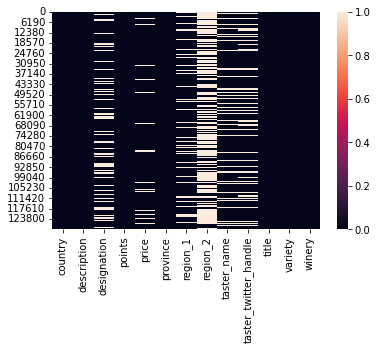

In [11]:
sns.heatmap(df.isnull()) # наглядная карта пропусков

In [12]:
df = df.drop(['region_2'], axis=1) # имеет порядка 60% пропусков, лучше избавиться от такого признака

<AxesSubplot:>

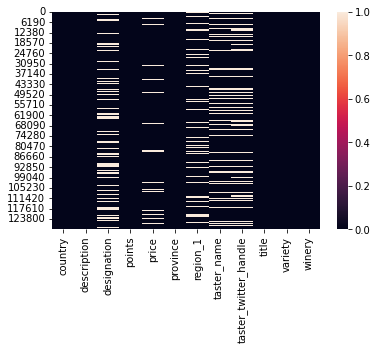

In [13]:
sns.heatmap(df.isnull()) # смотрим, какие признаки остались

In [14]:
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [15]:
df.describe(include='all')

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129971.000000,120975.000000,129908,108724,103727,98758,129971,129970,129971
unique,43,119955,37979,NaN,NaN,425,1229,19,15,118840,707,16757
top,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,NaN,NaN,California,Napa Valley,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,NaN,NaN,36247,4480,25514,25514,11,13272,222
mean,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown
df['designation'] = df['designation'].fillna('unknown')
df['region_1'] = df['region_1'].fillna('unknown')
df['taster_name'] = df['taster_name'].fillna('unknown')
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
df['country'] = df['country'].fillna('US')
df['price'] = df['price'].fillna(df['price'].mean())
df['province'] = df['province'].fillna('California')
df['variety'] = df['variety'].fillna('Pinot Noir')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129971 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [18]:
df.corr()

,points,price
points,1.000000,0.402137
price,0.402137,1.000000


In [19]:
# в числовом признаке выберем метод замены средним значением
df['price'] = df['price'].fillna(df['price'].mean())

<AxesSubplot:>

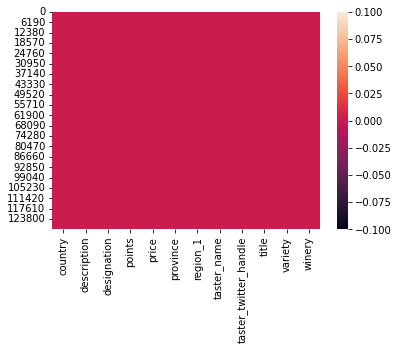

In [20]:
sns.heatmap(df.isnull()) # убеждаемся, что датасет без пропусков

In [21]:
data = df.to_csv('wine_cleared.csv', index=False) # сохраняем очищенный датасет для дальнейшей работы

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129971 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


# РАБОТА С PANDAS-PROFILING НА ПРИМЕРЕ ВИННЫХ ОБЗОРОВ

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

data = pd.read_csv('wine.csv')

## Сгенерируйте отчёт одной строкой.

In [ ]:
profile = ProfileReport(data, title="Wine Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# SWEETVIZ

## РАБОТА СО SWEETVIZ НА ПРИМЕРЕ ВИННЫХ ОБЗОРОВ

In [23]:
import pandas as pd
import sweetviz as sv

data = pd.read_csv('wine.csv')

In [24]:
## Чтобы проанализировать набор данных, просто используйте функцию analyze(), а затем — show_html():

report = sv.analyze(data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# D-TALE

In [25]:
import pandas as pd
import dtale

data = pd.read_csv('wine.csv')

In [26]:
d = dtale.show(data)
d


c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\views.py:725: FutureWarning:

['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'variety'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [27]:
data = pd.read_csv('wine_cleared.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129971 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [28]:
display(data)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [29]:
#Вычислите наименьший балл за вино в датасете.
data["points"].min()

80

In [30]:
data["price"] = round(data["price"])
data.groupby("price").count()

,country,description,designation,points,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
price,,,,,,,,,,,
4.0,11,11,11,11,11,11,11,11,11,11,11
5.0,46,46,46,46,46,46,46,46,46,46,46
6.0,120,120,120,120,120,120,120,120,120,120,120
7.0,433,433,433,433,433,433,433,433,433,433,433
8.0,892,892,892,892,892,892,892,892,892,892,892
...,...,...,...,...,...,...,...,...,...,...,...
1900.0,1,1,1,1,1,1,1,1,1,1,1
2000.0,2,2,2,2,2,2,2,2,2,2,2
2013.0,1,1,1,1,1,1,1,1,1,1,1


In [31]:
#Вычислите наименьший балл за вино в датасете.

data['points'] = round(data['points'])
data.groupby('points').count()

,country,description,designation,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
points,,,,,,,,,,,
80,397,397,397,397,397,397,397,397,397,397,397
81,692,692,692,692,692,692,692,692,692,692,692
82,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836
83,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025,3025
84,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480,6480
85,9530,9530,9530,9530,9530,9530,9530,9530,9530,9530,9530
86,12600,12600,12600,12600,12600,12600,12600,12600,12600,12600,12600
87,16933,16933,16933,16933,16933,16933,16933,16933,16933,16933,16933
88,17207,17207,17207,17207,17207,17207,17207,17207,17207,17207,17207


In [32]:
## Вычислите наименьшую цену за бутылку в наборе данных.

data["price"].min()

4.0

## СРЕДНЕЕ АРИФМЕТИЧЕСКОЕ

In [33]:
import statistics 
statistics.mean(df['price'])

35.363389129985535

In [ ]:
## Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python.
print(df['price'].mean())

35.363389129985535


In [34]:
## Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python.
mean = sum(df['price']) / len(df['price'])
print(mean)

35.36338912999136


## МЕДИАНА

In [35]:
## Задание 2.5

## Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics. Округлите значение до сотых.
statistics.median(df['price'])

28.0

In [36]:
## Вычислите медиану стоимости бутылки вина при помощи стандартных функций Pytho
print(df['price'].median())

28.0


In [ ]:
## Вычислите медиану стоимости бутылки вина при помощи стандартных функций Pytho
count_price = len(data['price']) # количество записей цен
sorted_price = sorted(data['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = sorted(x), round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

15.0

In [37]:
print(df['price'].median())

28.0


In [38]:
## Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics. Округлите значение до сотых.
statistics.mode(df['price'])

35.363389129985535

In [39]:
## Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи стандартных функций Python и pandas.
print(df['price'].mode())




0    35.363389
Name: price, dtype: float64


In [40]:
## Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи стандартных функций Python и pandas.
mode = round(df["price"].value_counts().index[0],2)
print(mode)

35.36


##                                                    Корреляция  

# КОРРЕЛЯЦИЯ ПИРСОНА

In [41]:

## Вычислите коэффициент корреляции между переменными в датасете винных обзоров. В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. Округлите ответ до шести знаков после запятой.
data.corr()

,points,price
points,1.000000,0.402065
price,0.402065,1.000000


In [42]:
df.corr()


,points,price
points,1.000000,0.402137
price,0.402137,1.000000


## → Давайте проверим наши данные винных обзоров на нормальность, используя метод визуализации.

2022-08-26 12:34:41,408 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-08-26 12:34:41,417 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-08-26 12:34:41,434 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_6180\3832664210.py:12: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



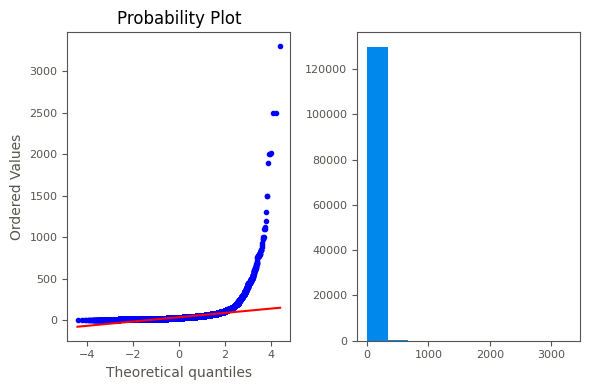

In [43]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_6180\2739504529.py:13: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



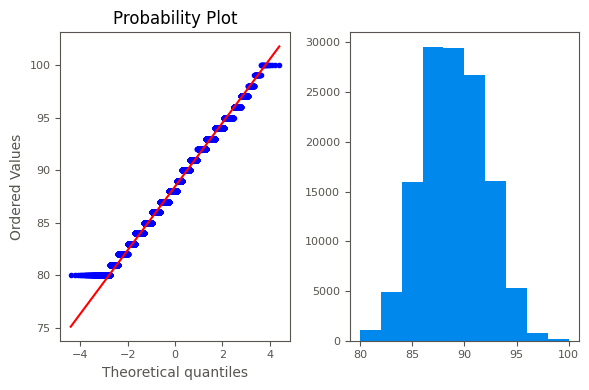

Executing shutdown due to inactivity...


2022-08-26 13:13:00,970 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-08-26 13:13:05,139 - INFO     - Executing shutdown...


Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\

2022-08-26 13:13:05,145 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Pyt

In [44]:
## Постройте приведённые выше графики для признака points из датасета винных обзоров и выберите верное утверждение:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

# КОРРЕЛЯЦИЯ СПИРМЕНА

In [49]:
# Рассчитайте коэффициент корреляции Спирмена для признаков point и price. Ответ округлите до сотых.

print(df.corr('spearman'))

          points     price
points  1.000000  0.581095
price   0.581095  1.000000


## КОРРЕЛЯЦИЯ КЕНДАЛЛА

In [47]:
## КОРРЕЛЯЦИЯ КЕНДАЛЛА
print(df.corr('kendall'))

          points     price
points  1.000000  0.433498
price   0.433498  1.000000


## КОРРЕЛЯЦИЯ МЭТЬЮСА

In [50]:
from sklearn.metrics import matthews_corrcoef

In [51]:
from sklearn.metrics import matthews_corrcoef

x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

# 6. Визуализация корреляций. Матрица корреляций. График рассеивания. Парные отношения в наборе данных

In [52]:
data = pd.read_csv('model.csv')

In [53]:
display(data)

,Month,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
0,December,1953,24.000000,36.000000,65.000000,118.000000,19.630000,0.670000
1,January,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
2,February,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
3,March,1954,24.000000,35.000000,66.000000,118.000000,19.040000,0.690000
4,April,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
...,...,...,...,...,...,...,...,...
657,September,2008,25.000000,36.000000,67.000000,115.000000,18.010000,0.690000
658,October,2008,24.000000,34.000000,65.000000,115.000000,19.130000,0.710000
659,November,2008,21.000000,32.000000,66.000000,108.000000,17.430000,0.660000
660,December,2008,25.000000,35.000000,68.000000,115.000000,17.480000,0.710000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      662 non-null    object 
 1   Year       662 non-null    int64  
 2   Waist      662 non-null    float64
 3   Hips       662 non-null    float64
 4   Height     662 non-null    float64
 5   Weight     662 non-null    float64
 6   BMI        662 non-null    float64
 7   Waist/Hip  662 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 41.5+ KB


In [55]:
data.corr()

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.000000,0.292518,-0.281576,0.284482,-0.010753,0.025309,0.458945
Waist,0.292518,1.000000,0.283060,0.372637,0.452704,0.136549,0.742284
Hips,-0.281576,0.283060,1.000000,0.228054,0.541836,0.211395,-0.422412
Height,0.284482,0.372637,0.228054,1.000000,0.706569,-0.037934,0.198754
Weight,-0.010753,0.452704,0.541836,0.706569,1.000000,0.212701,0.067543
BMI,0.025309,0.136549,0.211395,-0.037934,0.212701,1.000000,-0.010173
Waist/Hip,0.458945,0.742284,-0.422412,0.198754,0.067543,-0.010173,1.000000


In [63]:
print(data.corr('spearman'))

               Year     Waist      Hips    Height    Weight       BMI  \
Year       1.000000  0.293828 -0.277386  0.262027  0.014760 -0.271776   
Waist      0.293828  1.000000  0.340390  0.362536  0.482968  0.220709   
Hips      -0.277386  0.340390  1.000000  0.226442  0.572039  0.487947   
Height     0.262027  0.362536  0.226442  1.000000  0.686701 -0.240646   
Weight     0.014760  0.482968  0.572039  0.686701  1.000000  0.441349   
BMI       -0.271776  0.220709  0.487947 -0.240646  0.441349  1.000000   
Waist/Hip  0.511195  0.706754 -0.342530  0.188875  0.067696 -0.128184   

           Waist/Hip  
Year        0.511195  
Waist       0.706754  
Hips       -0.342530  
Height      0.188875  
Weight      0.067696  
BMI        -0.128184  
Waist/Hip   1.000000  


In [64]:
print(data.corr('kendall'))

               Year     Waist      Hips    Height    Weight       BMI  \
Year       1.000000  0.211839 -0.199318  0.182786  0.009768 -0.180390   
Waist      0.211839  1.000000  0.279883  0.283556  0.377429  0.168824   
Hips      -0.199318  0.279883  1.000000  0.173706  0.453544  0.370714   
Height     0.182786  0.283556  0.173706  1.000000  0.538728 -0.169526   
Weight     0.009768  0.377429  0.453544  0.538728  1.000000  0.315228   
BMI       -0.180390  0.168824  0.370714 -0.169526  0.315228  1.000000   
Waist/Hip  0.367989  0.581320 -0.266484  0.136876  0.044282 -0.087695   

           Waist/Hip  
Year        0.367989  
Waist       0.581320  
Hips       -0.266484  
Height      0.136876  
Weight      0.044282  
BMI        -0.087695  
Waist/Hip   1.000000  


In [66]:
print(data.corr('kendall'))

               Year     Waist      Hips    Height    Weight       BMI  \
Year       1.000000  0.211839 -0.199318  0.182786  0.009768 -0.180390   
Waist      0.211839  1.000000  0.279883  0.283556  0.377429  0.168824   
Hips      -0.199318  0.279883  1.000000  0.173706  0.453544  0.370714   
Height     0.182786  0.283556  0.173706  1.000000  0.538728 -0.169526   
Weight     0.009768  0.377429  0.453544  0.538728  1.000000  0.315228   
BMI       -0.180390  0.168824  0.370714 -0.169526  0.315228  1.000000   
Waist/Hip  0.367989  0.581320 -0.266484  0.136876  0.044282 -0.087695   

           Waist/Hip  
Year        0.367989  
Waist       0.581320  
Hips       -0.266484  
Height      0.136876  
Weight      0.044282  
BMI        -0.087695  
Waist/Hip   1.000000  


## ТЕПЛОВАЯ МАТРИЦА КОРРЕЛЯЦИЙ

In [58]:
import seaborn as sns

<AxesSubplot:>

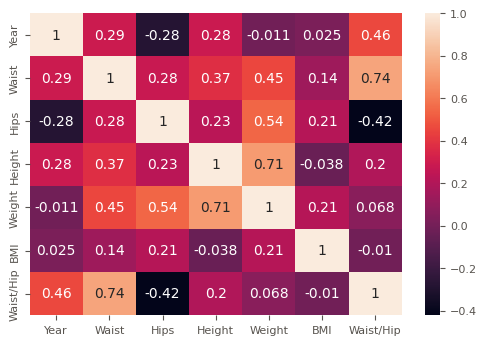

In [59]:
sns.heatmap(data.corr(), annot = True)

# SCATTERPLOT

<AxesSubplot:xlabel='Waist/Hip', ylabel='Waist'>

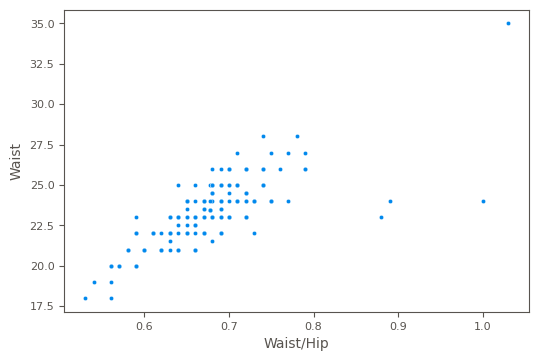

In [60]:
sns.scatterplot(data=data, x="Waist/Hip", y="Waist")

<AxesSubplot:xlabel='Weight', ylabel='Year'>

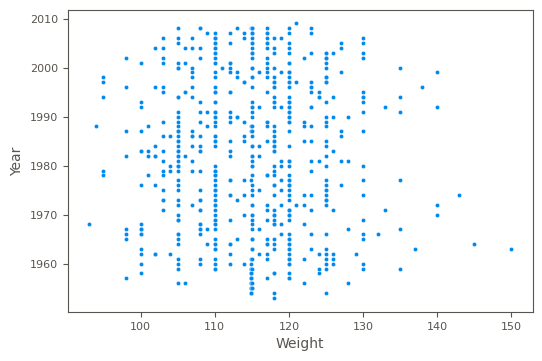

In [61]:
#где по оси x располагается признак Waist/Hip, а по оси y — признак Waist.

#Построим диаграмму для следующей пары признаков и сравним их.

sns.scatterplot(data=data, x="Weight", y="Year")

## ГРАФИК ПОПАРНЫХ ОТНОШЕНИЙ PAIRPLOT

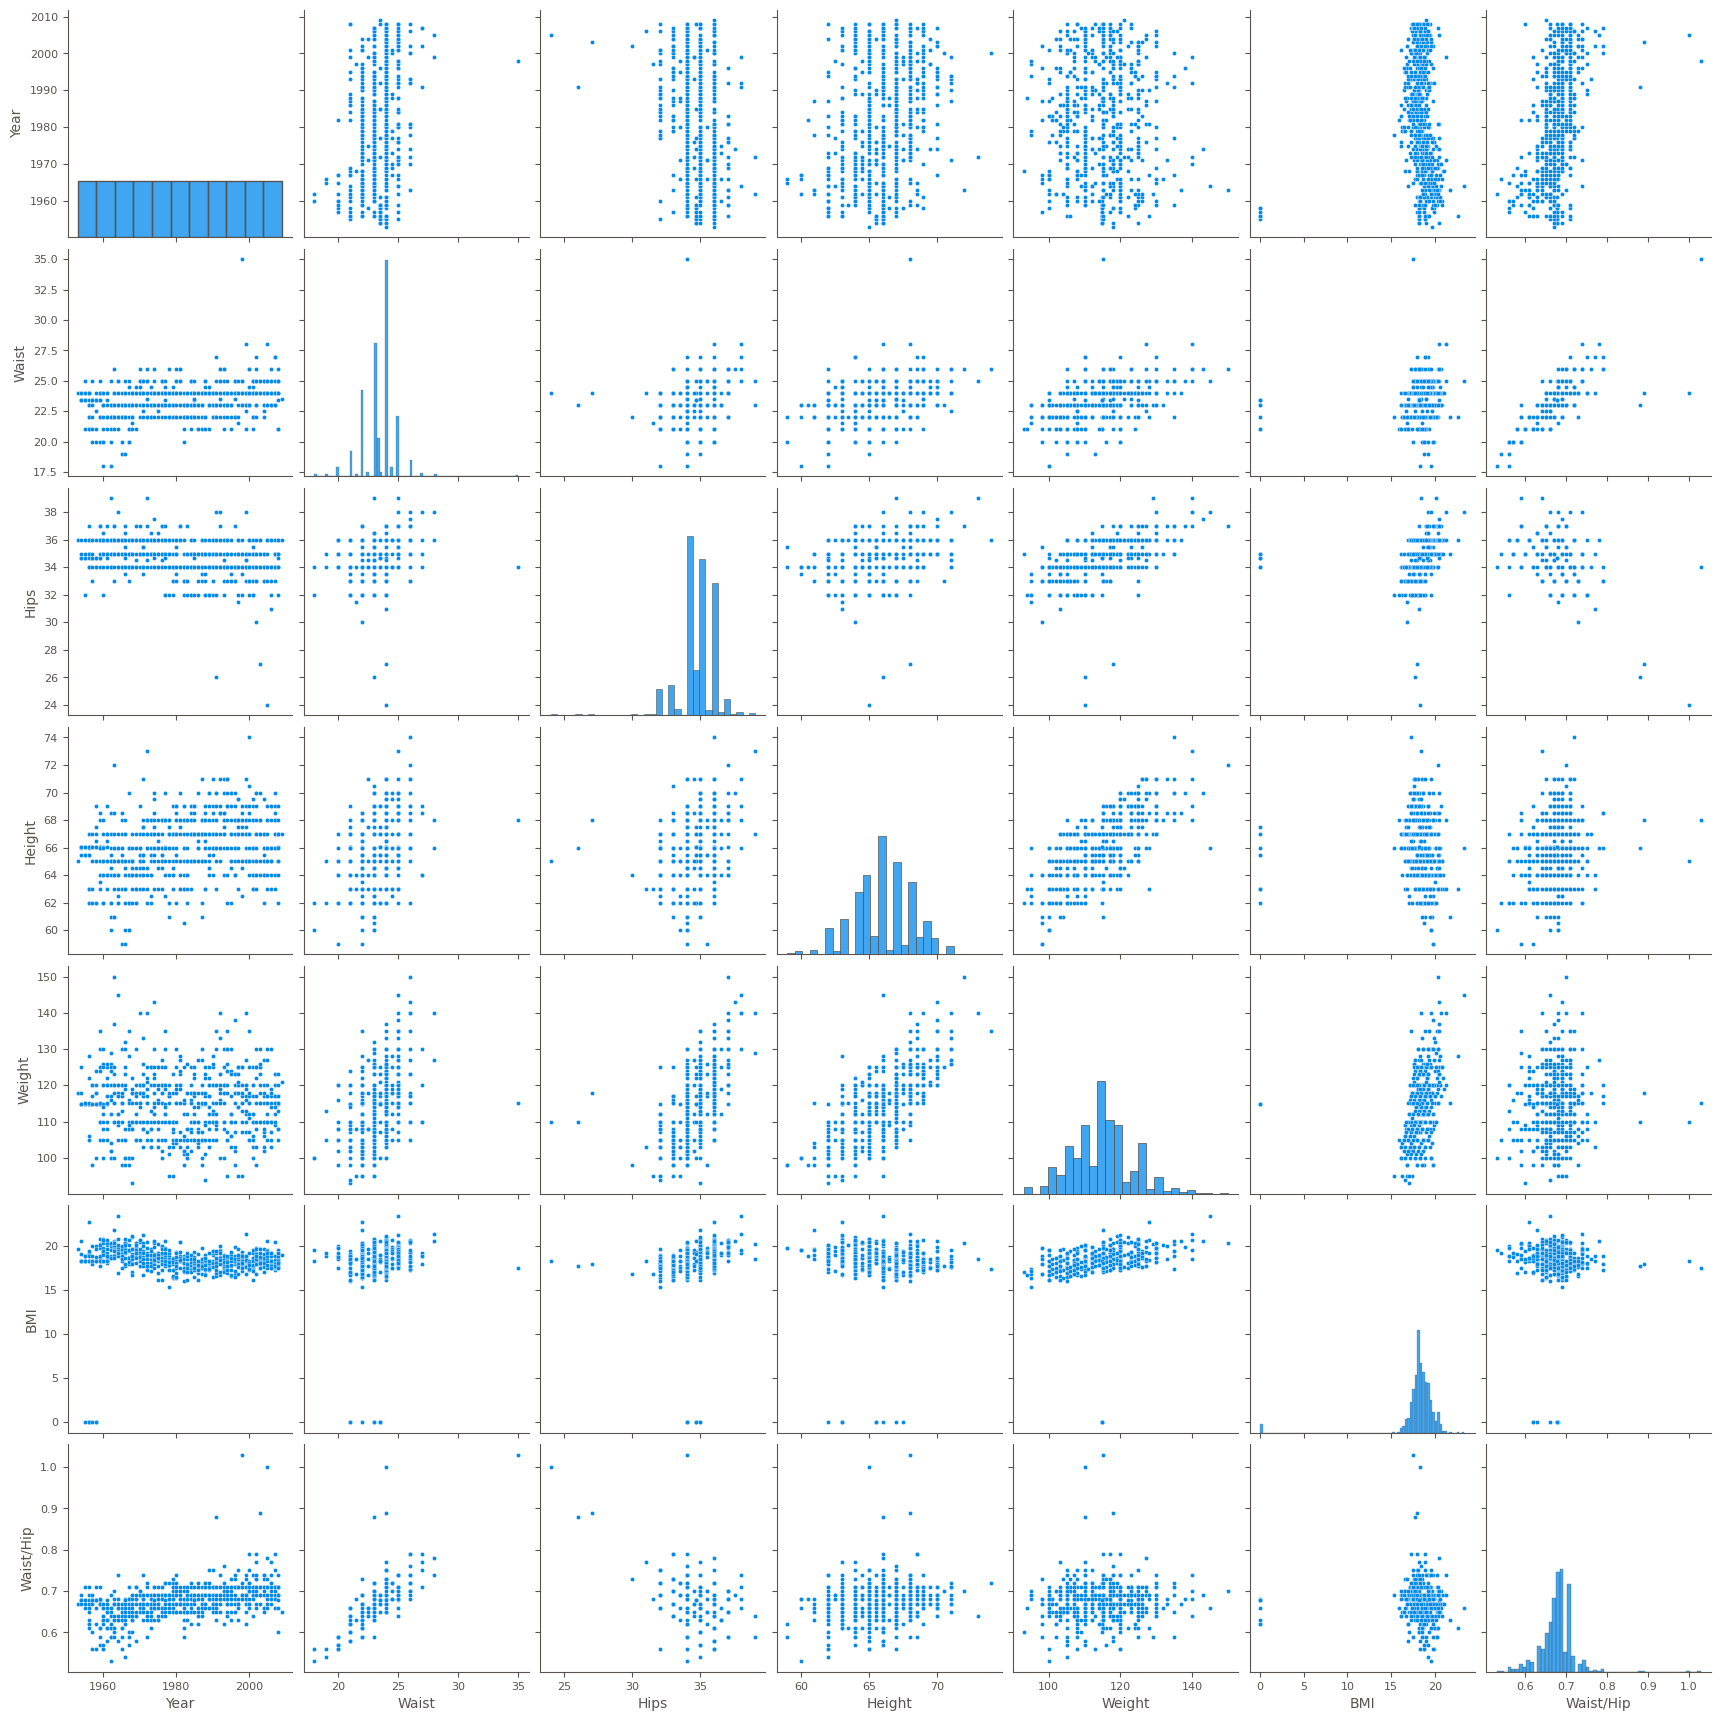

In [67]:
sns.pairplot(data)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      662 non-null    object 
 1   Year       662 non-null    int64  
 2   Waist      662 non-null    float64
 3   Hips       662 non-null    float64
 4   Height     662 non-null    float64
 5   Weight     662 non-null    float64
 6   BMI        662 non-null    float64
 7   Waist/Hip  662 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 41.5+ KB


In [75]:
## Рассчитайте среднее значение признаков при помощи библиотеки statistics для признаков weight и height. Ответ округлите до сотых.
data = pd.read_csv('model.csv')
statistics.mean(data['Weight'])


114.93606557377049

In [72]:
statistics.mean(data['Height'])

66.05725806451613

<AxesSubplot:xlabel='Year', ylabel='Weight'>

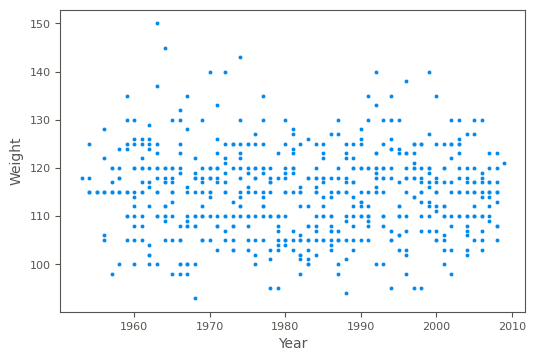

Executing shutdown due to inactivity...


2022-08-26 22:02:57,145 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-08-26 22:03:13,557 - INFO     - Executing shutdown...


Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\

2022-08-26 22:03:13,567 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\Дмитрий\AppData\Local\Programs\Python\Python39\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "c:\Users\Дмитрий\AppData\Local\Programs\Pyt

In [80]:
## Постройте матрицы визуализации корреляций, диаграммы рассеивания, проанализируйте и выполните задание.
sns.scatterplot(data=data, x="Year", y="Weight")